## Analysis 3: Time series analysis of Defense vs Non-Defense spending

In [1]:
%matplotlib inline

In [2]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Reading into dataframe from saved pickle file

In [3]:
pickle_df = pd.read_pickle('../Extra/us_spending_df.pickle')
pickle_df.head()

,AgencyID,AwardType,ContractDescription,ContractPricing,ContractingAgency,ContractingAgencyCode,DUNSNumber,DateSigned,DollarsObligated,ExtentCompeted,...,RecipientName,RecipientOrContractorName,RecipientState,RecipientZipCode,TransactionNumber,TransactionStatus,TypeofSpending,TypeofTransaction,UniqueTransactionID,VendorName
2016_MA_0_1,9700: DEPT OF DEFENSE,1,FMS AND US AEGIS PRODUCTION (FCS AND SPY TRANS...,Y,1700: DEPT OF THE NAVY,1700,193049236,2016-05-27T00:00:00.000,3.658488E+08,C,...,RAYTHEON COMPANY,RAYTHEON COMPANY,MA,01752,0,F,C,F,0,RAYTHEON COMPANY
2016_MA_0_2,9700: DEPT OF DEFENSE,1,MODERNIZATION OF SIX PATRIOT FIRE UNITS FOR TH...,Y,2100: DEPT OF THE ARMY,2100,196882310,2016-06-23T00:00:00.000,256459280,C,...,RAYTHEON COMPANY,RAYTHEON COMPANY,MA,01810,2,F,C,F,2,RAYTHEON COMPANY
2016_MA_0_3,9700: DEPT OF DEFENSE,1,DDG 1002 MSE,Y,1700: DEPT OF THE NAVY,1700,184724797,2015-12-31T00:00:00.000,2.552817E+08,C,...,RAYTHEON COMPANY,RAYTHEON COMPANY,MA,01876,0,F,C,F,0,RAYTHEON COMPANY
2016_MA_0_4,9700: DEPT OF DEFENSE,1,QATAR ADOC CONTRACT #2 UCA DEFINITIZATION,Y,5700: DEPT OF THE AIR FORCE,5700,184724797,2015-10-16T00:00:00.000,142685024,B,...,RAYTHEON COMPANY,RAYTHEON COMPANY,MA,01876,14,F,C,F,14,RAYTHEON COMPANY
2016_MA_0_5,9700: DEPT OF DEFENSE,1,ADDITIONAL F414 FY15 ENGINES,N,1700: DEPT OF THE NAVY,1700,001408509,2015-12-30T00:00:00.000,121208608,C,...,GENERAL ELECTRIC COMPANY,GENERAL ELECTRIC COMPANY,MA,01905,0,F,C,F,0,GENERAL ELECTRIC COMPANY


In [4]:
pickle_df['DollarsObligated'] = pickle_df['DollarsObligated'].apply(pd.to_numeric)
pickle_df['DateSigned'] = pickle_df['DateSigned'].apply(pd.to_datetime)

### Creating an identifier for each record to distinguish each contract as 'Defense' and 'Non-Defense'

In [6]:
pickle_df['DeptIdentifier'] = pickle_df.apply(lambda x:'Defense' if x['AgencyID'][0:4]=='9700' else 'Non-Defense',axis=1)
pickle_df.head()

,AgencyID,AwardType,ContractDescription,ContractPricing,ContractingAgency,ContractingAgencyCode,DUNSNumber,DateSigned,DollarsObligated,ExtentCompeted,...,RecipientOrContractorName,RecipientState,RecipientZipCode,TransactionNumber,TransactionStatus,TypeofSpending,TypeofTransaction,UniqueTransactionID,VendorName,DeptIdentifier
2016_MA_0_1,9700: DEPT OF DEFENSE,1,FMS AND US AEGIS PRODUCTION (FCS AND SPY TRANS...,Y,1700: DEPT OF THE NAVY,1700,193049236,2016-05-27,365848800.0,C,...,RAYTHEON COMPANY,MA,01752,0,F,C,F,0,RAYTHEON COMPANY,Defense
2016_MA_0_2,9700: DEPT OF DEFENSE,1,MODERNIZATION OF SIX PATRIOT FIRE UNITS FOR TH...,Y,2100: DEPT OF THE ARMY,2100,196882310,2016-06-23,256459280.0,C,...,RAYTHEON COMPANY,MA,01810,2,F,C,F,2,RAYTHEON COMPANY,Defense
2016_MA_0_3,9700: DEPT OF DEFENSE,1,DDG 1002 MSE,Y,1700: DEPT OF THE NAVY,1700,184724797,2015-12-31,255281700.0,C,...,RAYTHEON COMPANY,MA,01876,0,F,C,F,0,RAYTHEON COMPANY,Defense
2016_MA_0_4,9700: DEPT OF DEFENSE,1,QATAR ADOC CONTRACT #2 UCA DEFINITIZATION,Y,5700: DEPT OF THE AIR FORCE,5700,184724797,2015-10-16,142685024.0,B,...,RAYTHEON COMPANY,MA,01876,14,F,C,F,14,RAYTHEON COMPANY,Defense
2016_MA_0_5,9700: DEPT OF DEFENSE,1,ADDITIONAL F414 FY15 ENGINES,N,1700: DEPT OF THE NAVY,1700,001408509,2015-12-30,121208608.0,C,...,GENERAL ELECTRIC COMPANY,MA,01905,0,F,C,F,0,GENERAL ELECTRIC COMPANY,Defense


### Creating a pivot table to include the new column

In [7]:
pivot_tab = pd.pivot_table(pickle_df,values='DollarsObligated', index='DateSigned',columns=['DeptIdentifier'], aggfunc=np.sum)

In [8]:
pivot_tab.head()

DeptIdentifier,Defense,Non-Defense
DateSigned,,
2015-10-01,1.756764e+08,2.793747e+08
2015-10-02,4.786759e+07,3.980013e+06
2015-10-03,1.072469e+06,1.964938e+05
2015-10-04,1.182318e+04,NaN
2015-10-05,3.539041e+07,2.897386e+06


### Plot a time series graph to show the govt. spending over the period of two fiscal years 2016 & 2017 in 'Defense' and 'Non-Defense' departments 

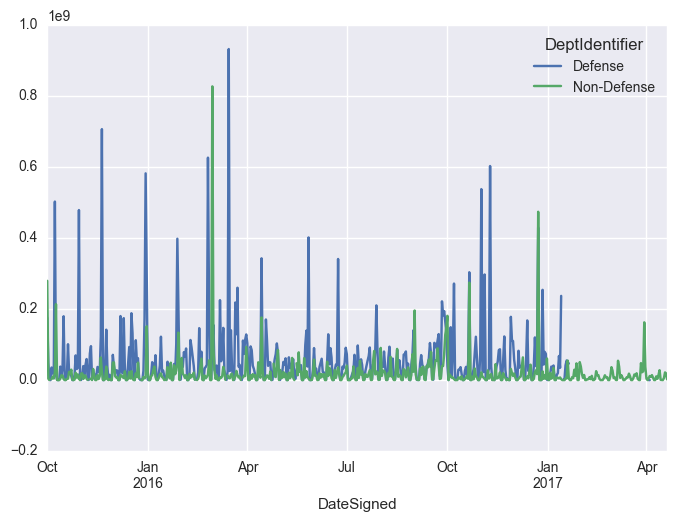

In [10]:
pivot_tab.plot()
plt.savefig('Analysis3/TimeSeriesComparison.png')

### Conclusion: From the above plot we can see that govt. spending was always been more towards the 'Defense' sector in 2016 which is good for the country's safety. But they also need to spend towards people's welfare by contributing in non-defense sector. 